# Importing Liabraries

In [93]:
# handling vectors
import numpy as np
import pandas as pd

# visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# NLP
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
stem=PorterStemmer()
from nltk.corpus import stopwords
lemmatizer=WordNetLemmatizer()
import nltk
import tensorflow as tf
nltk.download("stopwords")
nltk.download('wordnet')
stopwords=stopwords.words('english')



# evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import systemcheck

ModuleNotFoundError: No module named 'tensorflow'

# Loading Training and Testing Data

In [44]:
train=pd.read_csv('train.csv')
train = train.iloc[:8000,:]
test=pd.read_csv('test.csv')

In [45]:
train

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
7995,7995,Newt Gingrich Defends Donald Trump Against 'Se...,NaN,\nDonald Trump supporter and former Speaker o...,1
7996,7996,"‘What Is Aleppo?’ Gary Johnson Asks, in an Int...",Alan Rappeport,"Gary Johnson, the former New Mexico governor a...",0
7997,7997,We told you so! The Zika virus is harmless,NaN,In March we wrote: Reading About Zika May Hurt...,1
7998,7998,Lawyer ’Robin Hood of Refugees’ Sentenced to 1...,Katherine Rodriguez,A federal judge sentenced an Illinois immigrat...,0


In [46]:
test

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


# Data Analysis

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8000 non-null   int64 
 1   title   7783 non-null   object
 2   author  7244 non-null   object
 3   text    7986 non-null   object
 4   label   8000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 312.6+ KB


In [48]:
train['author'].value_counts()

Pam Key                                                                95
admin                                                                  73
Jerome Hudson                                                          57
Katherine Rodriguez                                                    57
Ian Hanchett                                                           54
                                                                       ..
Daisuke Wakabayashi and Brian X. Chen                                   1
Benjamin Hoffman and David Waldstein                                    1
Jason Horowitz, Helene Cooper, Jennifer Steinhauer and Adam Goldman     1
ColdTrifecta                                                            1
Maggie Haberman, Matthew Rosenberg, Matt Apuzzo and Glenn Thrush        1
Name: author, Length: 2318, dtype: int64

# checking null values

In [49]:
train.isna().sum()

id          0
title     217
author    756
text       14
label       0
dtype: int64

# Data preprocessing


In [50]:
train.drop(columns=['id'],inplace=True)

# droping the columns which has null values

In [51]:
train=train.dropna(axis=0)

In [52]:
train

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...
7993,Texas Open-Carry Laws Blurred Lines Between Su...,"Manny Fernandez, Alan Blinder and David Montgo...",DALLAS — As a demonstration against police ...,0
7994,Jeff Sessions on Immigration Law: ’I’m Going t...,Julia Hahn,Alabama Senator Jeff Sessions told the Senate ...,0
7996,"‘What Is Aleppo?’ Gary Johnson Asks, in an Int...",Alan Rappeport,"Gary Johnson, the former New Mexico governor a...",0
7998,Lawyer ’Robin Hood of Refugees’ Sentenced to 1...,Katherine Rodriguez,A federal judge sentenced an Illinois immigrat...,0


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   7027 non-null   object
 1   author  7027 non-null   object
 2   text    7027 non-null   object
 3   label   7027 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 274.5+ KB


In [54]:
train['label'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       1
4       1
       ..
7993    0
7994    0
7996    0
7998    0
7999    0
Name: label, Length: 7027, dtype: int64>

# Data Visualization
checking if the distribution is same..

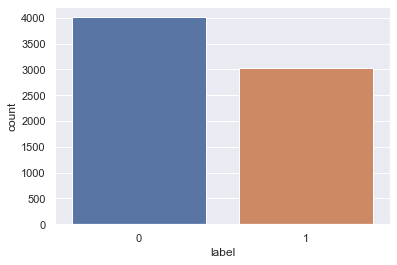

In [55]:
sns.countplot(x=train["label"],data=train)
plt.show()

# defining function for cleaning
regex module will clean all the values according to the given pattern,here in the program the values which are not alphabets are cleaned...
word tokenizer will divide the each word
lemmatizer will give the origin of the word based on context

In [56]:
def cleaning(ques):
    cleaned=[]
    pattern=r"[^A-Za-z]"
    for k in ques:
        k=re.sub(pattern," ",k)
        k=word_tokenize(k)
        k=[x for x in k if x not in stopwords]
        k=[lemmatizer.lemmatize(x) for x in k]
        cleaned.append(" ".join(k))
    return cleaned

In [57]:
train.loc[:,'text']  =  cleaning(train['text'])
train.loc[:,'title'] =  cleaning(train['title'])
train.loc[:,'author'] = cleaning(train['author'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [58]:
train.head()

,title,author,text,label
0,House Dem Aide We Didn Even See Comey Letter U...,Darrell Lucus,House Dem Aide We Didn Even See Comey Letter U...,1
1,FLYNN Hillary Clinton Big Woman Campus Breitbart,Daniel J Flynn,Ever get feeling life circle roundabout rather...,0
2,Why Truth Might Get You Fired,Consortiumnews com,Why Truth Might Get You Fired October The tens...,1
3,Civilians Killed In Single US Airstrike Have B...,Jessica Purkiss,Videos Civilians Killed In Single US Airstrike...,1
4,Iranian woman jailed fictional unpublished sto...,Howard Portnoy,Print An Iranian woman sentenced six year pris...,1


# getting all the words from text

In [59]:
text1 = train['text'].to_string().lower()
text2=train['title'].to_string().lower()
text3=train['author'].to_string().lower()
##converting all the text to string format and to lower case 

## building the word cloud
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

In [60]:
def fun(text):
    from wordcloud import WordCloud
    wordcloud = WordCloud(
        collocations=False,
        relative_scaling=0.5,
        stopwords=set(stopwords)).generate(text)

    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# word cloud for text column in train data

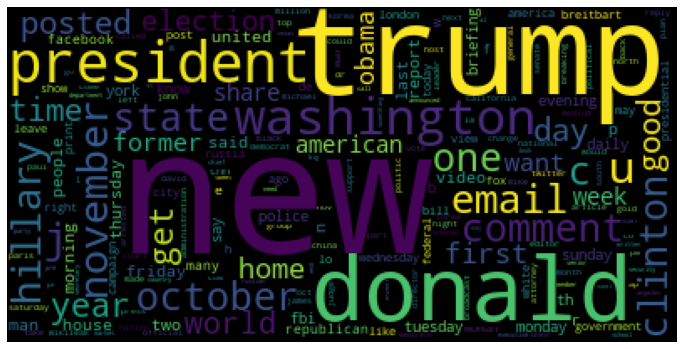

In [61]:
fun(text1)#wordcloud of text in train data

# word cloud for title column in train data

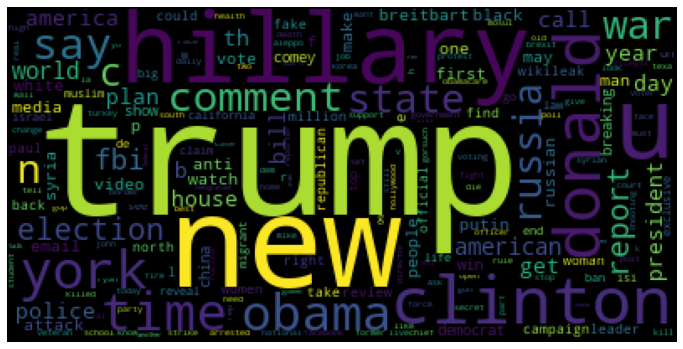

In [62]:
fun(text2)#word cloud of titles

# word cloud for author column

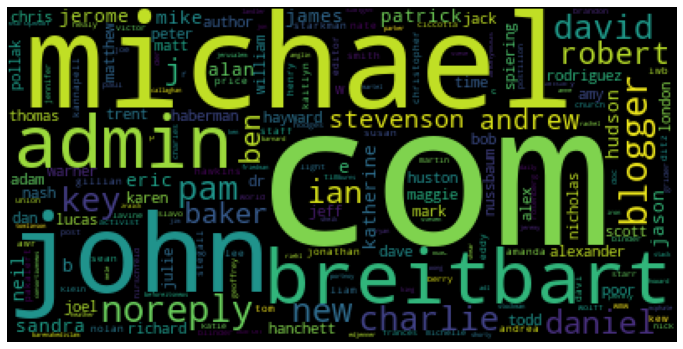

In [63]:
fun(text3)#word cloud  of authors

In [64]:
print(len(text1))
print(len(text2))
print(len(text3))

407565
407565
407565


# cleaning text for term frequency

#now cleaning the data in the 'text' and calculating the most frequently used words..


In [65]:
text1 = re.sub(r"[^A-Za-z]"," ",text1)
text1 = word_tokenize(text1)
#A stop word is a commonly used word (such as “the”, “a”, “an”, “in” and so on...)
text1 = [x for x in text1 if x not in stopwords]#if the words in text not in the stopwords they are added to list

In [66]:
text1[:10]

['house', 'dem', 'aide', 'even', 'see', 'comey', 'letter', 'u', 'ever', 'get']

In [67]:
clean_text = []
for i in text1:
    if i not in stopwords and i.isalnum():
        clean_text.append(i)
print(len(clean_text))

44960


In [68]:
clean_text[:10]

['house', 'dem', 'aide', 'even', 'see', 'comey', 'letter', 'u', 'ever', 'get']

# Calculating term frequency
Term frequency is the no.of times a word appeares in a document to the total no of words in document

In [69]:
count_dic = {}
for i in set(clean_text):
    count_dic[i] = clean_text.count(i)

# Sorting the word with their term freqency in descending order

In [70]:
sorted_values = list(sorted(count_dic.values(), reverse = True))[:30]
sorted_word_dic = {}
for i in range(30):
    for j in count_dic.keys():
        if count_dic[j] == sorted_values[i]:
            sorted_word_dic[j] = sorted_values[i]
    

In [71]:
sorted_word_dic

{'trump': 550,
 'donald': 327,
 'president': 324,
 'washington': 319,
 'news': 293,
 'new': 282,
 'november': 220,
 'email': 197,
 'hillary': 196,
 'october': 178,
 'c': 164,
 'clinton': 163,
 'j': 161,
 'one': 161,
 'u': 148,
 'posted': 139,
 'good': 136,
 'year': 135,
 'get': 135,
 'day': 130,
 'state': 125,
 'world': 120,
 'first': 117,
 'home': 115,
 'election': 114,
 'former': 112,
 'us': 110,
 'want': 109,
 'obama': 109,
 'week': 104}

# ploting top 30 most frequent words

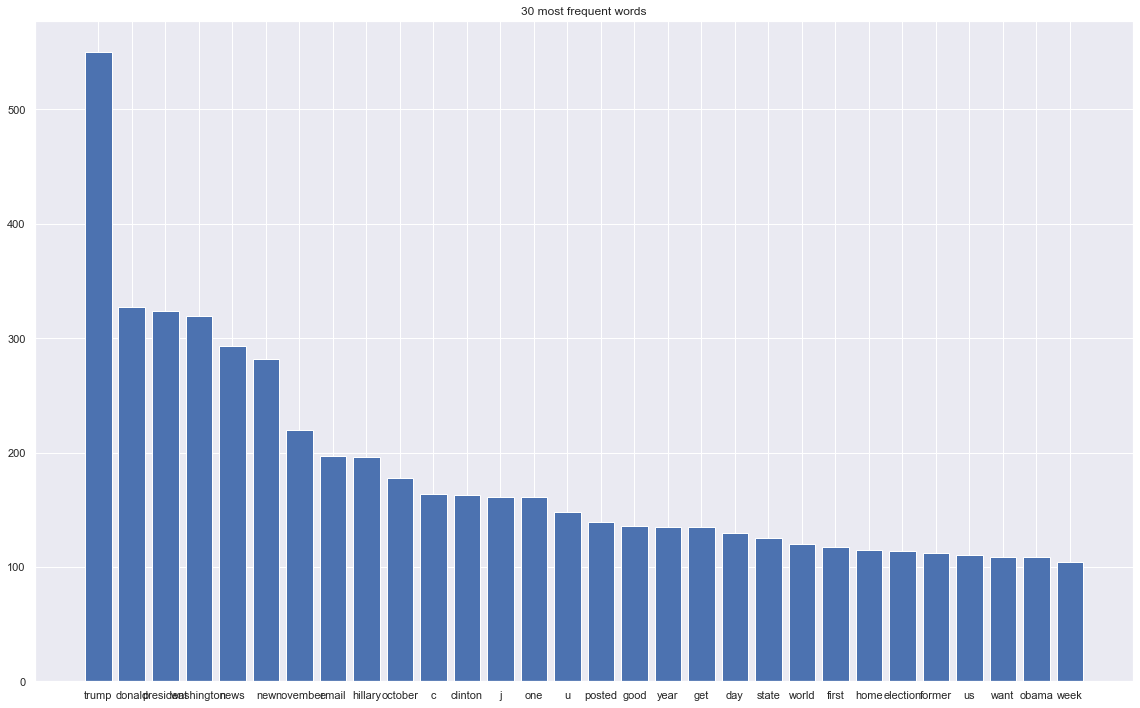

In [72]:
plt.figure(figsize = (16,10))
plt.bar(sorted_word_dic.keys(), sorted_word_dic.values())
plt.title("30 most frequent words")
plt.tight_layout()
plt.show()

# TF-IDF
Term frequency-Inverse document frequency(TF-IDF) is a statistical measure used to evaluate how important a word is to a document in a collection 

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy
vectorizer = TfidfVectorizer()
vectorizer.fit(pd.concat((train['title'],train['author'],train['text'])).unique())
tf1=vectorizer.transform(train['title'].values)
tf2=vectorizer.transform(train['author'].values)
tf3=vectorizer.transform(train['text'].values)
y=train['label'].values


In [74]:
x=scipy.sparse.hstack((tf1,tf2,tf3))

In [75]:
x.shape

(7027, 257370)

In [76]:
y.shape

(7027,)

# next splitting the data into training data and testing data

In [77]:
from sklearn.model_selection import train_test_split
t_train, t_test, l_train, l_test = train_test_split(x, y)

# Training the data with Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(t_train, l_train)

RandomForestClassifier()

# Calculating the accuracy,confusion matrix and classification report

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
predict1=clf.predict(t_test)
print('accuracy',round(accuracy_score(l_test,predict1)*100,4),'%')
print('confusion matrix\n',confusion_matrix(l_test,predict1))
print('classification report\n',classification_report(l_test,predict1))

accuracy 92.9994 %
confusion matrix
 [[968  17]
 [106 666]]
classification report
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       985
           1       0.98      0.86      0.92       772

    accuracy                           0.93      1757
   macro avg       0.94      0.92      0.93      1757
weighted avg       0.93      0.93      0.93      1757



In [80]:
cmatrix=confusion_matrix(l_test,predict1)

# Graphical representation of confusion matrix

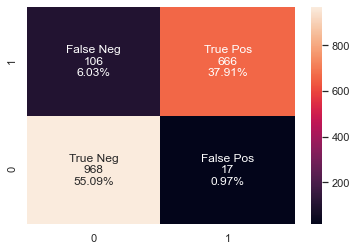

In [81]:
# plt.figure(figsize=(8,6))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = [value for value in cmatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


ax=sns.heatmap(cmatrix,annot=labels,fmt='')
ax.set_ylim(0,2)
plt.show()


# Training the data with Support Vector Classifier

In [82]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(t_train, l_train)

SVC()

# Calculating the accuracy,confusion matrix and classification report

In [83]:

predict1=svm.predict(t_test)
print('accuracy',round(accuracy_score(l_test,predict1)*100,4),'%')
print('confusion matrix\n',confusion_matrix(l_test,predict1))
print('classification report\n',classification_report(l_test,predict1))

accuracy 99.4878 %
confusion matrix
 [[977   8]
 [  1 771]]
classification report
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       985
           1       0.99      1.00      0.99       772

    accuracy                           0.99      1757
   macro avg       0.99      1.00      0.99      1757
weighted avg       0.99      0.99      0.99      1757



In [84]:
cmatrix=confusion_matrix(l_test,predict1)

# Graphical representation of confusion matrix

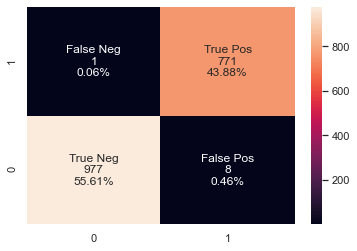

In [85]:
# plt.figure(figsize=(8,6))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = [value for value in cmatrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


ax=sns.heatmap(cmatrix,annot=labels,fmt='')
ax.set_ylim(0,2)
plt.show()


# Data preprocessing for CNN model

In [86]:
x_train=t_train.astype(np.uint8).toarray()

In [87]:
x_test=t_test.astype(np.uint8).toarray()

In [88]:
x_train.shape

(5270, 257370)

In [89]:
x_test.shape

(1757, 257370)

In [90]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [91]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [92]:
cnnmodel = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(64,3, input_shape = x_train.shape[1:]),
  tf.keras.layers.MaxPool1D(3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2, activation='softmax')
])

NameError: name 'tf' is not defined

In [ ]:
cnnmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnnmodel.summary()

In [ ]:
history=cnnmodel.fit(x_train, l_train, batch_size=1, epochs=5,validation_data=(x_test,l_test))

In [ ]:
cnnmodel.evaluate(x_test,  l_test, verbose=2)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['val_acc'],label="validation_accuracy",color="red")
plt.plot(history.history['acc'],label="training_accuracy",color="green")
plt.xlabel("epoch")
plt.ylabel('Accuracy')
plt.xticks(range(1,6))
plt.legend()
plt.show()


In [ ]:
plt.plot(history.history['val_loss'],label="validation_loss",color="red")
plt.plot(history.history['loss'],label="training_loss",color="green")
plt.xlabel("epoch")
plt.ylabel('loss')
plt.xticks(range(1,6))
plt.legend()
plt.show()


In [ ]:
cnn_predict = []
for i in cnnmodel.predict(x_test):
    cnn_predict.append(np.argmax(i))

In [ ]:
print('accuracy',round(accuracy_score(l_test,cnn_predict)*100,4),'%')
print('confusion matrix\n',confusion_matrix(l_test,cnn_predict))
print('classification report\n',classification_report(l_test,cnn_predict))